In [ ]:
from google.colab import drive
from google.colab import files

In [ ]:
!mkdir GD

In [ ]:
!ls

GD  sample_data


In [ ]:
drive.mount('/GD',force_remount=True)

Mounted at /GD


In [ ]:
!cp -r /GD/'My Drive'/PetImages.zip .

In [ ]:
!ls 

GD  PetImages.zip  sample_data


In [ ]:
!unzip PetImages.zip

In [ ]:
!ls

GD  PetImages  PetImages.zip  sample_data


In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
!mkdir PetImages/validation_data

In [ ]:
!ls PetImages

test  train  validation_data


In [ ]:
!mkdir PetImages/validation_data/Dog

In [ ]:
!mkdir PetImages/validation_data/Cat

In [ ]:
!ls PetImages/validation_data

Cat  Dog


## разделение данных на тестовое и обучающее множество

In [ ]:
import os, shutil
import random as rn

In [ ]:
train_dirs = ['PetImages/train/Dog', 
              'PetImages/train/Cat']

test_dirs =  ['PetImages/validation_data/Dog', 
              'PetImages/validation_data/Cat']

In [ ]:
# рандобно выбирает объекты и передается в новые папки 

for i in range(len(train_dirs)):
    fnames = os.listdir(train_dirs[i])
    toCopy = len(fnames)//10

    filesToCopy = []
    for j in range(toCopy):
        filesToCopy.append(rn.choice(fnames))
    
    # cOPY
         
    for fi in filesToCopy:
        src = os.path.join(train_dirs[i],fi)
        dst = os.path.join(test_dirs[i], fi)
        shutil.copyfile(src,dst)

    # удаляет
    for fi in filesToCopy:
        try:
            src = os.path.join(train_dirs[i],fi)
            os.remove(src)
            print(src+' deleted')
            #time.sleep(1)
        except:
            pass


In [ ]:
# осмотр получившихся директорий

In [ ]:
!ls PetImages/validation_data/Dog

10005.jpg  11619.jpg  1809.jpg	3319.jpg  4964.jpg  6585.jpg  8423.jpg
10036.jpg  11638.jpg  181.jpg	3329.jpg  4999.jpg  6586.jpg  8489.jpg
10039.jpg  11661.jpg  1824.jpg	3342.jpg  4.jpg     6595.jpg  8492.jpg
10048.jpg  1167.jpg   1826.jpg	3345.jpg  5008.jpg  6601.jpg  8497.jpg
10055.jpg  11681.jpg  182.jpg	3358.jpg  5031.jpg  6621.jpg  8512.jpg
10068.jpg  11686.jpg  1836.jpg	3369.jpg  5047.jpg  662.jpg   851.jpg
10076.jpg  11707.jpg  1846.jpg	336.jpg   5074.jpg  663.jpg   8523.jpg
10080.jpg  11719.jpg  1862.jpg	3378.jpg  5123.jpg  664.jpg   8534.jpg
10107.jpg  11735.jpg  1867.jpg	3392.jpg  5127.jpg  6655.jpg  8550.jpg
10109.jpg  1173.jpg   1871.jpg	3405.jpg  5153.jpg  6657.jpg  855.jpg
10110.jpg  11765.jpg  1872.jpg	3433.jpg  5156.jpg  6660.jpg  8561.jpg
10155.jpg  11768.jpg  1876.jpg	3468.jpg  515.jpg   6665.jpg  8562.jpg
10188.jpg  11770.jpg  1880.jpg	3469.jpg  5165.jpg  6679.jpg  8566.jpg
10191.jpg  11773.jpg  1893.jpg	3481.jpg  5193.jpg  6696.jpg  8567.jpg
10234.jpg  1180.jpg   18

## подготовка генераторов

In [ ]:
Pic_Y, Pic_X = 180, 180
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
                            
train_generator = train_datagen.flow_from_directory('PetImages/train',
                                                   target_size = (Pic_Y, Pic_X),
                                                   batch_size = 64,
                                                   class_mode = 'binary')

Found 18504 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
                            
test_generator = test_datagen.flow_from_directory('PetImages/test',
                                                   target_size = (Pic_Y, Pic_X),
                                                   batch_size = 64,
                                                   class_mode = 'binary')

Found 4542 images belonging to 2 classes.


In [ ]:
model1 = models.Sequential()

model1.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape = (Pic_Y, Pic_X, 3)))
model1.add(layers.MaxPooling2D(pool_size=2))

model1.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=2))

model1.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=2))

model1.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=2))
model1.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))

model1.add(layers.Flatten())
model1.add(layers.Dense(1, activation="sigmoid"))


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [ ]:
model1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.h5",
        save_best_only=True,
        monitor="val_accuracy")]

In [ ]:
history1 = model1.fit(train_generator, epochs=3, validation_data=test_generator,
    callbacks=callbacks)

Epoch 1/3
290/290 [==============================] - ETA: 0s - loss: 0.6455 - accuracy: 0.6113

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


290/290 [==============================] - 100s 293ms/step - loss: 0.6455 - accuracy: 0.6113 - val_loss: 0.5705 - val_accuracy: 0.7004
Epoch 2/3
290/290 [==============================] - 83s 285ms/step - loss: 0.5301 - accuracy: 0.7349 - val_loss: 0.4683 - val_accuracy: 0.7763
Epoch 3/3
290/290 [==============================] - 97s 336ms/step - loss: 0.4444 - accuracy: 0.7945 - val_loss: 0.3785 - val_accuracy: 0.8300


In [ ]:
!ls

convnet_from_scratch.h5  GD  PetImages	PetImages.zip  sample_data


In [ ]:
!cp convnet_from_scratch.h5 /GD/'My Drive'/convnet_from_scratch.h5

## Добавляем расширение данных 

In [ ]:
model2 = models.Sequential()

model2.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape = (Pic_Y, Pic_X, 3)))
model2.add(layers.MaxPooling2D(pool_size=2))

model2.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
model2.add(layers.MaxPooling2D(pool_size=2))

model2.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
model2.add(layers.MaxPooling2D(pool_size=2))

model2.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
model2.add(layers.MaxPooling2D(pool_size=2))
model2.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))

model2.add(layers.Flatten())
model2.add(layers.Dense(1, activation="sigmoid"))


In [ ]:
model2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(
        filepath="augmentation_model.h5",
        save_best_only=True,
        monitor="val_loss")]

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 25,
                                   shear_range = 0.15,
                                   zoom_range = 0.3,
                                   fill_mode = 'nearest')
                            
train_generator = train_datagen.flow_from_directory('PetImages/train',
                                                   target_size = (Pic_Y, Pic_X),
                                                   batch_size = 64,
                                                   class_mode = 'binary')

Found 18504 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
                            
test_generator = test_datagen.flow_from_directory('PetImages/test',
                                                   target_size = (Pic_Y, Pic_X),
                                                   batch_size = 64,
                                                   class_mode = 'binary')

Found 4542 images belonging to 2 classes.


In [ ]:
history2 = model2.fit(train_generator, epochs=5, validation_data=test_generator,
    callbacks=callbacks)

Epoch 1/5
290/290 [==============================] - ETA: 0s - loss: 0.6754 - accuracy: 0.5701

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


290/290 [==============================] - 202s 688ms/step - loss: 0.6754 - accuracy: 0.5701 - val_loss: 0.6742 - val_accuracy: 0.5641
Epoch 2/5
290/290 [==============================] - 199s 686ms/step - loss: 0.5929 - accuracy: 0.6812 - val_loss: 0.4866 - val_accuracy: 0.7693
Epoch 3/5
290/290 [==============================] - 207s 713ms/step - loss: 0.5129 - accuracy: 0.7531 - val_loss: 0.4442 - val_accuracy: 0.7893
Epoch 4/5
290/290 [==============================] - 204s 704ms/step - loss: 0.4558 - accuracy: 0.7846 - val_loss: 0.3557 - val_accuracy: 0.8474
Epoch 5/5
290/290 [==============================] - 199s 684ms/step - loss: 0.4134 - accuracy: 0.8120 - val_loss: 0.3479 - val_accuracy: 0.8448


## Перенос знаний!

In [ ]:
# закгрузка сверточных слоев VGG16

conv_base = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Заморозка сверточных слоев
conv_base.trainable = False

In [ ]:
# Конструируем модель
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(
        filepath="VGG_FIX_model.h5",
        save_best_only=True,
        monitor="val_loss")]

In [ ]:
history3 = model3.fit(train_generator, epochs=1, validation_data=test_generator, 
    callbacks=callbacks)

290/290 [==============================] - 238s 799ms/step - loss: 0.3918 - accuracy: 0.8174 - val_loss: 0.2037 - val_accuracy: 0.9119


функция принимающая изображение и дающая прогноз (кот /собака) с использованием всех трех моделей

In [ ]:
# функция принимающая изображение и дающая прогноз (кот /собака) с использованием всех трех моделей
def get_prediction(image):
    image = np.array(image.resize((Pic_Y, Pic_X))) / 255
    image = np.expand_dims(image, axis=0)

    prediction1 = model1.predict(image)
    prediction2 = model2.predict(image)
    prediction3 = model3.predict(image)

    print('Предсказание первой модели:', prediction1)
    print('Предсказание второй модели:', prediction2)
    print('Предсказание третьей модели:', prediction3)

    predictions = (prediction1 + prediction2 + prediction3) / 3
    if predictions >= 0.5:
      print('Dog')
    else:
      print('Cat')

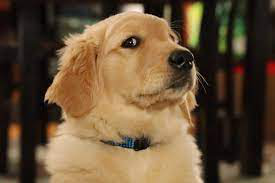

In [ ]:
from PIL import Image
import numpy as np
image = Image.open("Dog.jpg")
image.show()

In [ ]:
get_prediction(image)

1/1 [==============================] - 0s 18ms/step
Предсказание первой модели: [[0.94063]]
Предсказание второй модели: [[0.9929483]]
Предсказание третьей модели: [[0.9999201]]
Dog


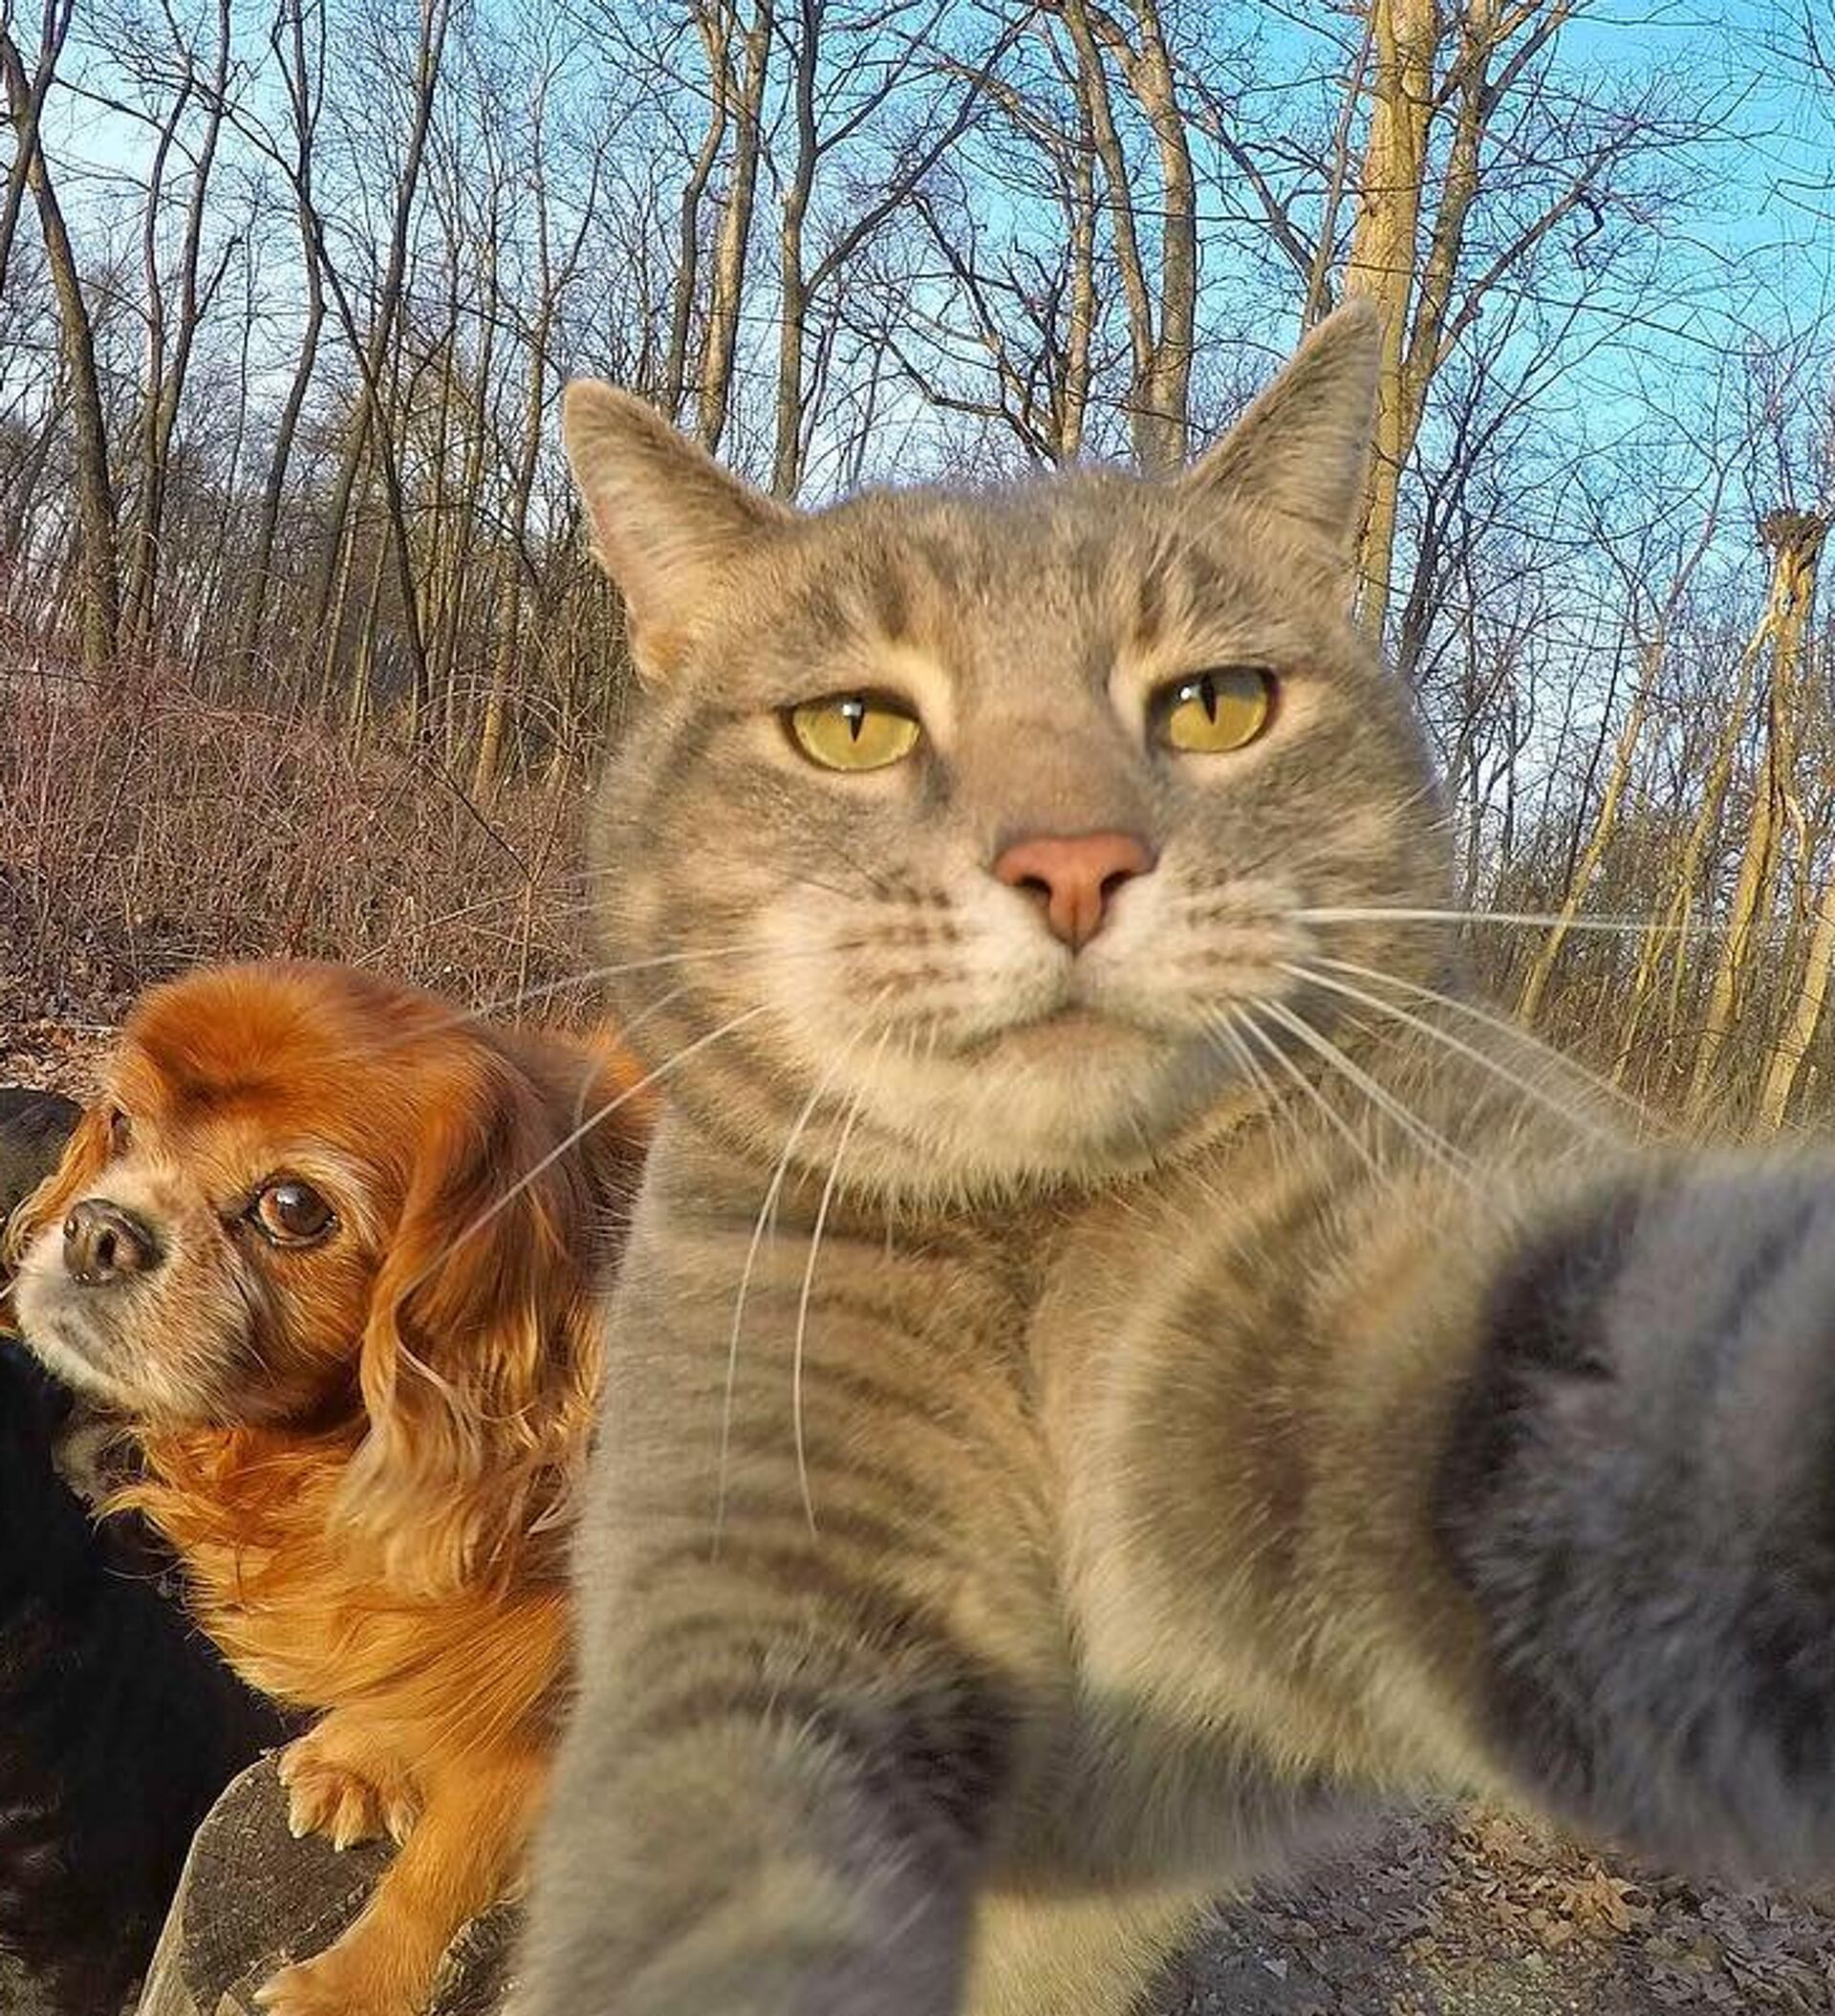

1/1 [==============================] - 0s 29ms/step
Предсказание первой модели: [[0.06659203]]
Предсказание второй модели: [[0.00978144]]
Предсказание третьей модели: [[0.01665439]]
Cat


In [ ]:
image2 = Image.open("c+d.jpg")
image2.show()
get_prediction(image2)